In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [28]:
# Load data
file_path = "./mnist_test.csv"
data = pd.read_csv(file_path)

In [29]:
# Gets the 2 digits
labels = data['label']
features = data.drop(columns=['label'])

# Filter only the digit 2 data
X_digit2 = features[labels == 2].values

In [30]:
# Remove the mean
X_digit2_mean_removed = X_digit2 - np.mean(X_digit2, axis=0)

# Apply PCA after mean removal
pca_mean_removed = PCA(n_components=30)
X_pca_mean_removed = pca_mean_removed.fit_transform(X_digit2_mean_removed)
X_reconstructed_mean_removed = pca_mean_removed.inverse_transform(X_pca_mean_removed)

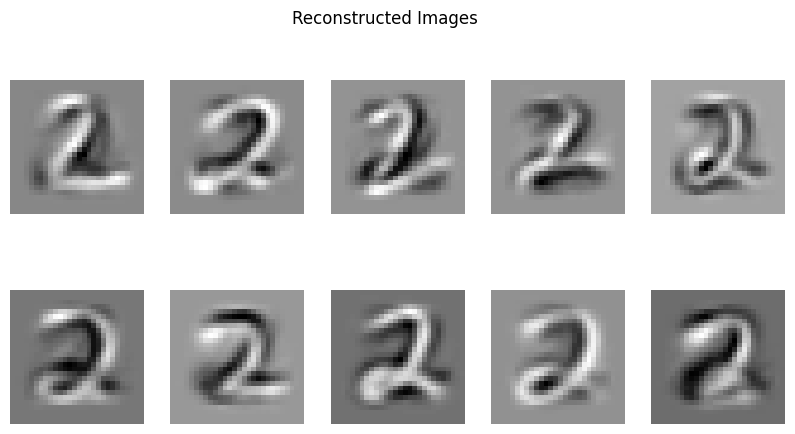

In [31]:
# Get the images
def plot_images(images, title, n=10):
    plt.figure(figsize=(10, 5))
    for i in range(n):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot the first 10 reconstructed images
plot_images(X_reconstructed_mean_removed, "Reconstructed Images")